# SINDy Test for DC motor model and data

## Import necessary libraries

In [1]:
import math
import numpy as np
np.math = math
import pysindy as ps

import matplotlib.pyplot as plt

import scipy.io as sio
import h5py
import scipy.signal as sig

## Load data from a .mat file
The file must contain arrays for each quantity:
- position
- velocity
- current
- voltage
- time
- reference

In [ ]:
file_path = 'chirp_data.mat'
data = sio.loadmat(file_path)

# Measured states
position = np.squeeze(data.get('position'))
current = np.squeeze(data.get('current'))
f_current = sig.savgol_filter(current, 25, 5) # Filtered measure through savitsky-golay filter

# Computed states
velocity = sig.savgol_filter(position, 25, 1, deriv = 1, delta = 0.001) # Differentiation and filtering through savitsky-golay filter

# Measured control input
voltage = np.squeeze(data.get('voltage'))

# Time and reference signal
time = np.squeeze(data.get('time'))
reference = np.squeeze(data.get('reference'))

## Plot the data to verify the correct dataset is loaded

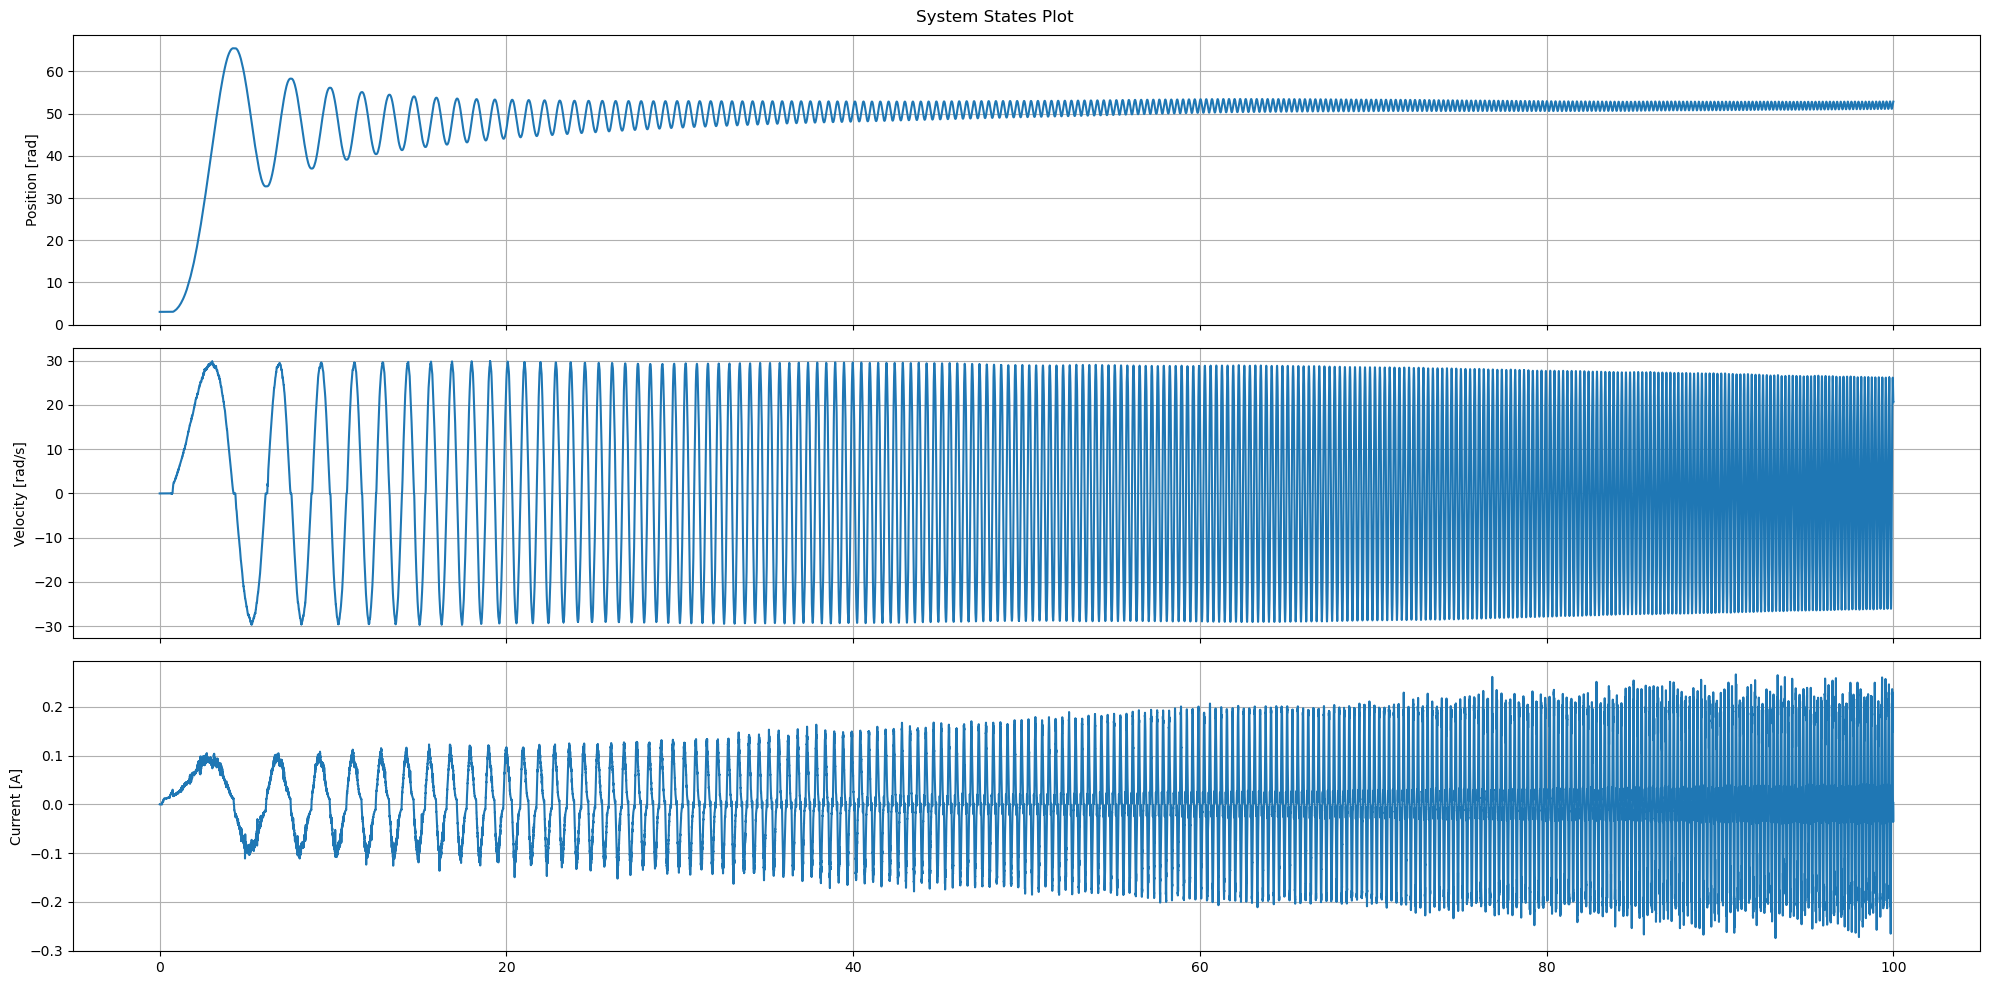

In [22]:
fig, axs = plt.subplots(3, sharex = True,)
fig.set_size_inches(20,10)
fig.set_tight_layout(True)
fig.suptitle('System States Plot')

axs[0].plot(time, position)
axs[0].set_ylabel('Position [rad]')
axs[0].grid(visible = True, which = 'both')

axs[1].plot(time, velocity)
axs[1].set_ylabel('Velocity [rad/s]')
axs[1].grid(visible = True, which = 'both')

axs[2].plot(time, f_current)
axs[2].set_ylabel('Current [A]')
axs[2].grid(visible = True, which = 'both')

#axs[2].set_xlim([0, 10])

## Control Input Function definition for sinusoidal chirp

$$\delta(t) = \cos(\psi(t) + \phi_0) \qquad\qquad\qquad \psi(t) = 2\pi\left(f_0t + \beta t^2\right) \qquad\qquad\qquad \beta = \frac{f_g-f_0}{2t_g}$$

where:
- $f_0$ is the initial frequency;
- $f_g$ is the final frequency;
- $\phi_0$ is the initial phase;
- $t_g$ is the time it takes to sweep from $f_0$ to $f_g$;

in the case of this experiment:
- $f_0 = 0.01\ [Hz]$
- $f_g = 5\ [Hz]$
- $\phi_0 = \frac{3}{2}\pi\ [rad]$
- $t_g = 100\ [s]$


In [48]:
def u_fun(t):
    PI = np.pi
    f0 = 0.01
    fg = 5
    tg = 100
    phi0 = 1.5*PI
    beta = (fg-f0)/(2*tg)
    
    return np.column_stack([np.cos(phi0 + 2*PI*(f0*t + beta*np.pow(t, 2)))])

u_train = u_fun(time)

## Plot the data to verify the control input function is correct

(87.5, 100.0)

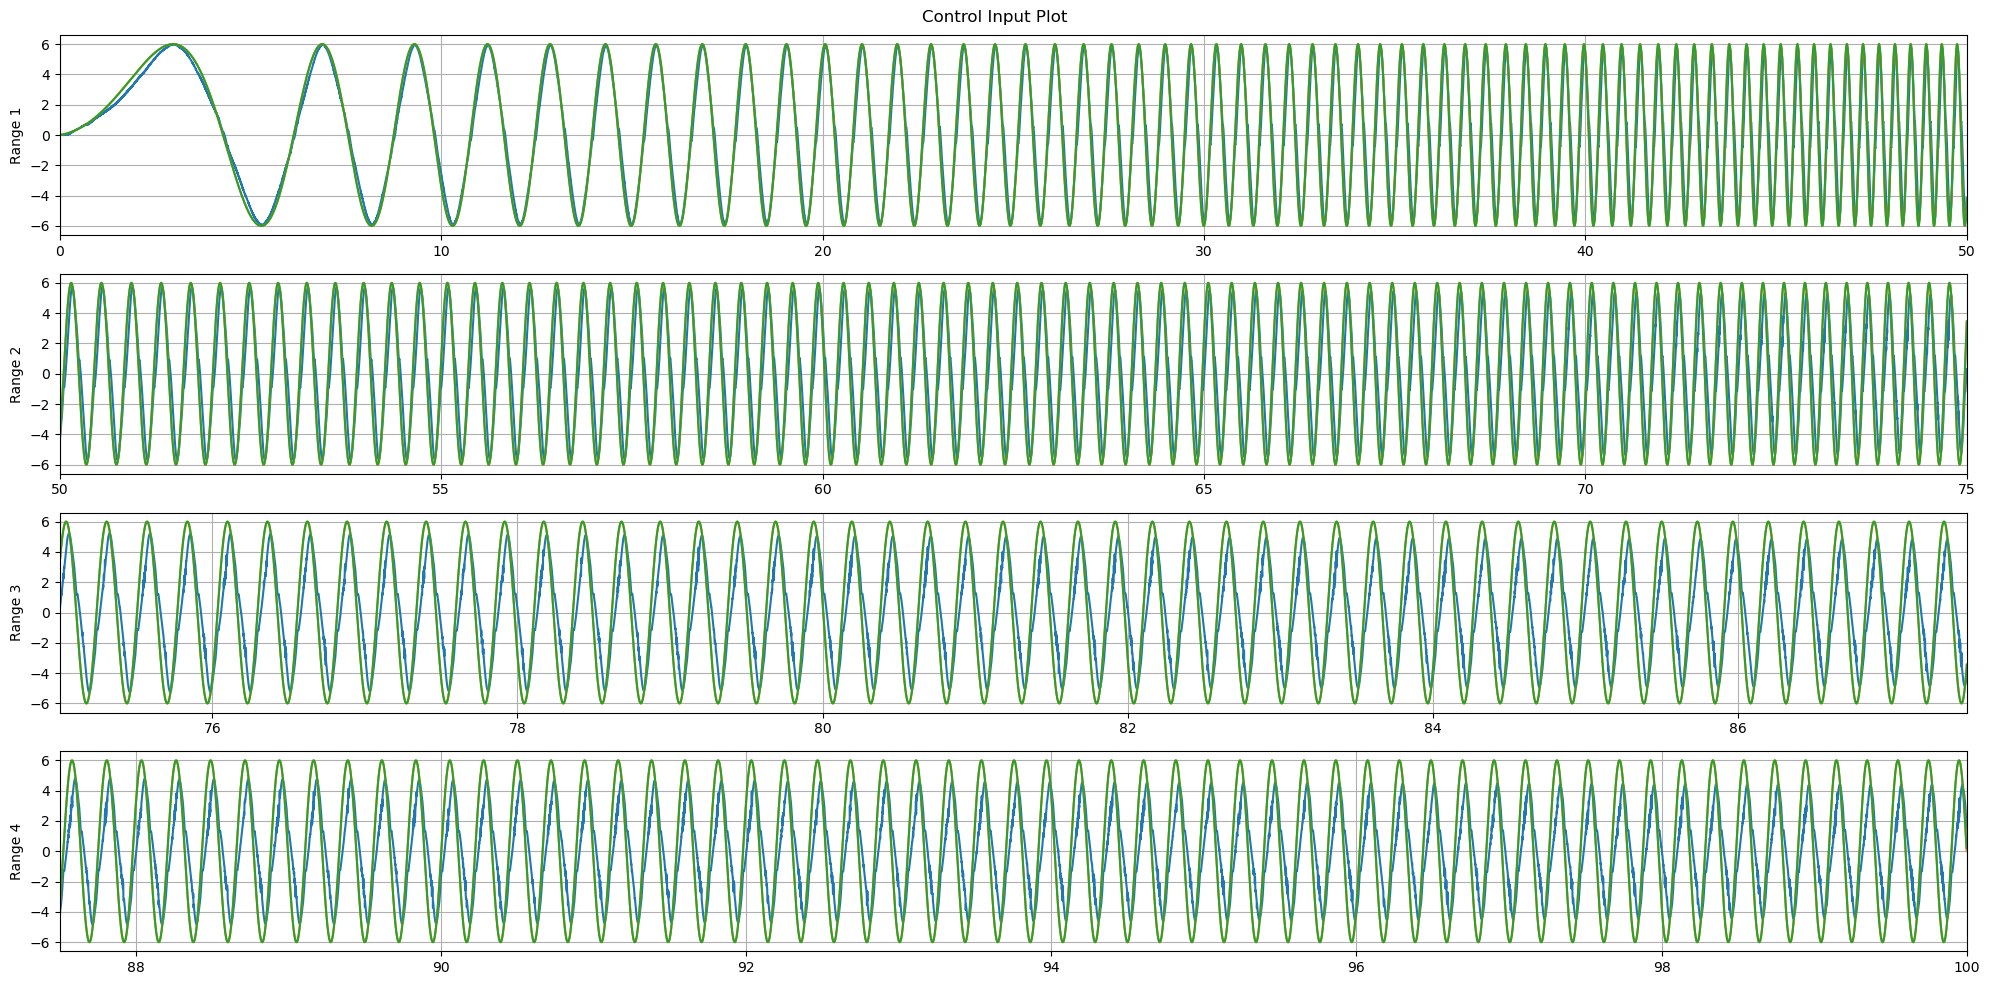

In [49]:
fig, axs = plt.subplots(4)
fig.set_size_inches(20,10)
fig.set_tight_layout(True)
fig.suptitle('Control Input Plot')

axs[0].plot(time, voltage, label = 'Measure')
axs[0].plot(time, 6*u_train, label = 'Function')
axs[0].plot(time, 6*reference, label = 'Command')
axs[0].set_ylabel('Range 1')
axs[0].grid(visible = True, which = 'both')
axs[0].set_xlim((0, 50))

axs[1].plot(time, voltage, label = 'Measure')
axs[1].plot(time, 6*u_train, label = 'Function')
axs[1].plot(time, 6*reference, label = 'Command')
axs[1].set_ylabel('Range 2')
axs[1].grid(visible = True, which = 'both')
axs[1].set_xlim((50, 75))

axs[2].plot(time, voltage, label = 'Measure')
axs[2].plot(time, 6*u_train, label = 'Function')
axs[2].plot(time, 6*reference, label = 'Command')
axs[2].set_ylabel('Range 3')
axs[2].grid(visible = True, which = 'both')
axs[2].set_xlim((75, 87.5))

axs[3].plot(time, voltage, label = 'Measure')
axs[3].plot(time, 6*u_train, label = 'Function')
axs[3].plot(time, 6*reference, label = 'Command')
axs[3].set_ylabel('Range 4')
axs[3].grid(visible = True, which = 'both')
axs[3].set_xlim((87.5, 100))

## Experiment on savitsky-golay filtering algorithm
### Varying window length and polynomial degree

In [ ]:
for 


(100001, 1)
(100001, 1)
(100001, 3)
(100001, 3)
(100001, 1)


(98.0, 100.0)

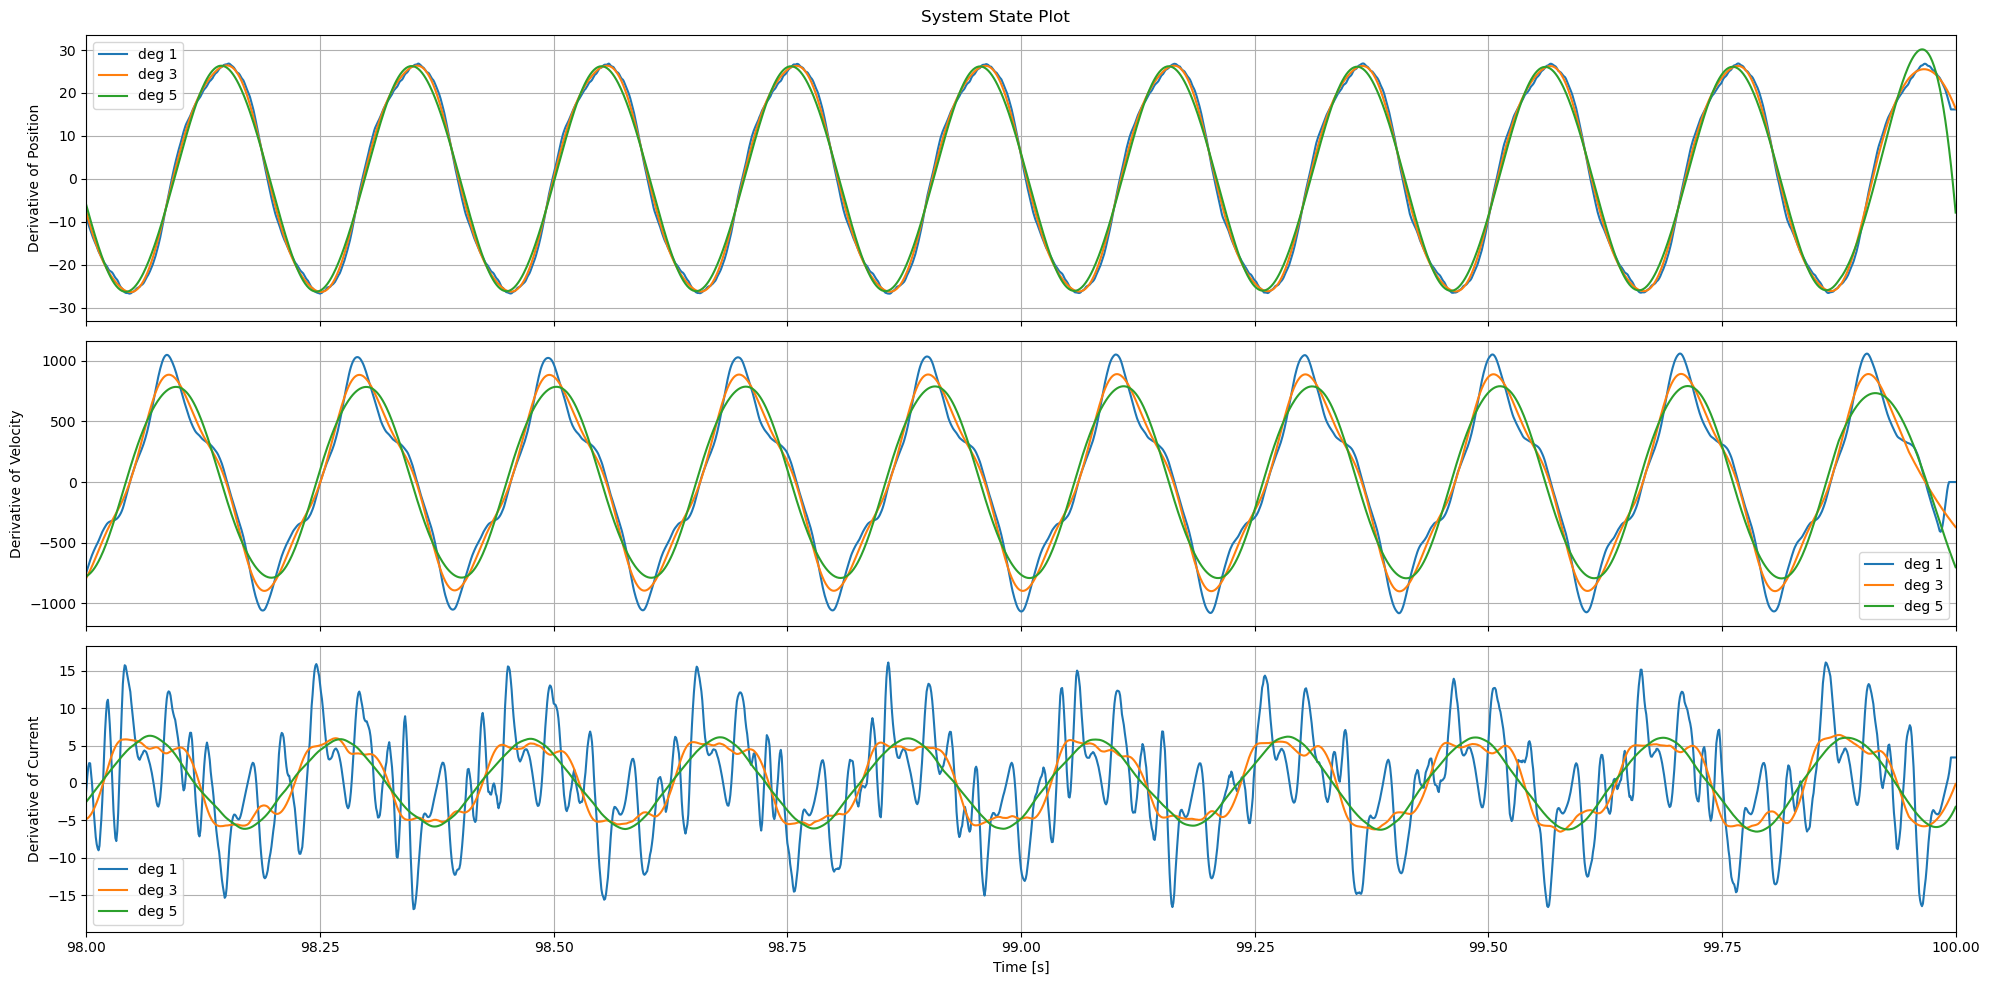

In [4]:
feature_names = ['th', 'w', 'i', 'v']
dt = 0.001; # Sampling time

v_train = np.resize(np.transpose(voltage), (100001, 1))
print(v_train.shape)
print(u_train.shape)

x_train = np.transpose(np.stack([position, velocity, f_current]))
print(x_train.shape)

x_dot_train0 = sig.savgol_filter(x_train, 11, 1, deriv = 1, delta = dt, axis = 0)
x_dot_train1 = sig.savgol_filter(x_train, 101, 3, deriv = 1, delta = dt, axis = 0)
x_dot_train2 = sig.savgol_filter(x_train, 251, 5, deriv = 1, delta = dt, axis = 0)
print(x_dot_train0.shape)

t_train = np.resize(time, (100001, 1))
print(t_train.shape)


fig, axs = plt.subplots(3, sharex = True,)
fig.set_size_inches(20,10)
fig.set_tight_layout(True)
fig.suptitle('System State Plot')

axs[0].plot(time, x_dot_train0[:, 0], label = 'deg 1')
axs[0].plot(time, x_dot_train1[:, 0], label = 'deg 3')
axs[0].plot(time, x_dot_train2[:, 0], label = 'deg 5')
axs[0].set_ylabel('Derivative of Position')
axs[0].grid(visible = True, which = 'both')
axs[0].legend()

axs[1].plot(time, x_dot_train0[:, 1], label = 'deg 1')
axs[1].plot(time, x_dot_train1[:, 1], label = 'deg 3')
axs[1].plot(time, x_dot_train2[:, 1], label = 'deg 5')
axs[1].set_ylabel('Derivative of Velocity')
axs[1].grid(visible = True, which = 'both')
axs[1].legend()

axs[2].plot(time, x_dot_train0[:, 2], label = 'deg 1')
axs[2].plot(time, x_dot_train1[:, 2], label = 'deg 3')
axs[2].plot(time, x_dot_train2[:, 2], label = 'deg 5')
axs[2].set_ylabel('Derivative of Current')
axs[2].grid(visible = True, which = 'both')
axs[2].legend()
axs[2].set_xlabel('Time [s]')
axs[2].set_xlim([98, 100])

In [12]:
# Custom Library
polynomial_functions = [
    lambda x: 1/np.sqrt(np.pow(x, 2) + np.pow(0.01, 2)),    # deg -1 (regularized)
    lambda x: x,                                            # deg 1
    lambda x: np.pow(x, 2),                                 # deg 2 (pure)
    lambda x, y: x*y,                                       # deg 2 (mixed)
]
polynomial_function_names = [
    lambda x: '1/sqrt(' + x + '^2 + 0.01^2)',               # deg -1 (regularized)
    lambda x: x,                                            # deg 1
    lambda x: x + '^2',                                     # deg 2 (pure)
    lambda x, y: x + '*' + y,                               # deg 2 (mixed)
]

polynomial_library = ps.CustomLibrary(library_functions = polynomial_functions, function_names = polynomial_function_names)

stribeck_functions = [
    lambda x: np.sign(x),                                   # sign
    lambda x: np.exp(-np.pow(x/0.1, 2)),                    # normal exponential
    lambda x: np.sign(x)*np.exp(-np.pow(x/0.1, 2)),         # signed exponential
]
stribeck_function_names = [
    lambda x: 'sign(' + x + ')',                            # normal sign
    lambda x: 'exp(-(' + x + '/0.1)^2)',                    # normal exponential
    lambda x: 'sign(' + x + ')*exp(-(' + x + '/0.1)^2)',    # signed exponential (pure)
]

stribeck_library = ps.CustomLibrary(library_functions = stribeck_functions, function_names = stribeck_function_names)

sindy_library = polynomial_library + stribeck_library


derivative_functions = [lambda x: x]
derivative_function_names = [lambda x: x]

PI_library = ps.SINDyPILibrary(
    library_functions = polynomial_functions + stribeck_functions,
    x_dot_library_functions = derivative_functions,
    t = time,
    function_names = polynomial_function_names + stribeck_function_names + derivative_function_names,
)


"""
    # Fourier
    lambda x: np.sin(x),                  # sine freq 1
    lambda x: np.cos(x),                  # cos freq 1
    lambda x: np.sin(2*x),                # sine freq 2
    lambda x: np.cos(2*x),                # cos freq 2

    # Scaled Fourier                    
    lambda x: x*np.sin(x),                # sine freq 1 (pure)
    lambda x: x*np.cos(x),                # cos freq 1 (pure)
    lambda x: x*np.sin(2*x),              # sine freq 2 (pure)
    lambda x: x*np.cos(2*x),              # cos freq 2 (pure)

    lambda x, y: x*np.sin(y),             # sine freq 1 (mixed)
    lambda x, y: x*np.cos(y),             # cos freq 1 (mixed)
    lambda x, y: x*np.sin(2*y),           # sine freq 2 (mixed)
    lambda x, y: x*np.cos(2*y),           # cos freq 2 (mixed) 

    # Sign

    lambda x: x*np.sign(x),                 # scaled sign (pure)
    lambda x, y: x*np.sign(y),              # scaled sign (mixed)

    # Exponential
    lambda x, y: np.sign(x)*np.exp(-pow(x/0.1, 2))   # signed exponential (pure)
                    ]
"""

"""
    # Fourier
    lambda x: 'sin(' + x + ')',                  # sine freq 1
    lambda x: 'cos(' + x + ')',                  # cos freq 1
    lambda x: 'sin(2*' + x + ')',                # sine freq 2
    lambda x: 'cos(2*' + x + ')',                # cos freq 2

    # Scaled Fourier                    
    lambda x: x + '*sin(' + x + ')',              # sine freq 1 (pure)
    lambda x: x + '*cos(' + x + ')',              # cos freq 1 (pure)
    lambda x: x + '*sin(2*' + x + ')',            # sine freq 2 (pure)
    lambda x: x + '*cos(2*' + x + ')',            # cos freq 2 (pure)

    lambda x, y: x + '*sin(' + y + ')',           # sine freq 1 (mixed)
    lambda x, y: x + '*cos(' + y + ')',           # cos freq 1 (mixed)
    lambda x, y: x + '*sin(2*' + y + ')',         # sine freq 2 (mixed)
    lambda x, y: x + '*cos(2*' + y + ')',         # cos freq 2 (mixed) 

    # Sign
    lambda x: x + '*sign(' + x + ')',             # scaled sign (pure)
    lambda x, y: x + '*sign(' + y + ')',          # scaled sign (mixed)

    # Exponential
    lambda x, y: 'sign(' + x + ')*exp(-(' + y + '/0.1)^2)'   # signed exponential (pure)
                    ]
"""

PI_library.fit(x_train, u_train)
print(PI_library.get_feature_names(feature_names))

['1/sqrt(th^2 + 0.01^2)', '1/sqrt(w^2 + 0.01^2)', '1/sqrt(i^2 + 0.01^2)', 'th', 'w', 'i', 'th^2', 'w^2', 'i^2', 'th*w', 'th*i', 'w*i', 'sign(th)', 'sign(w)', 'sign(i)', 'exp(-(th/0.1)^2)', 'exp(-(w/0.1)^2)', 'exp(-(i/0.1)^2)', 'sign(th)*exp(-(th/0.1)^2)', 'sign(w)*exp(-(w/0.1)^2)', 'sign(i)*exp(-(i/0.1)^2)', 'th_dot', 'w_dot', 'i_dot', '1/sqrt(th^2 + 0.01^2)th_dot', '1/sqrt(w^2 + 0.01^2)th_dot', '1/sqrt(i^2 + 0.01^2)th_dot', 'thth_dot', 'wth_dot', 'ith_dot', 'th^2th_dot', 'w^2th_dot', 'i^2th_dot', 'th*wth_dot', 'th*ith_dot', 'w*ith_dot', 'sign(th)th_dot', 'sign(w)th_dot', 'sign(i)th_dot', 'exp(-(th/0.1)^2)th_dot', 'exp(-(w/0.1)^2)th_dot', 'exp(-(i/0.1)^2)th_dot', 'sign(th)*exp(-(th/0.1)^2)th_dot', 'sign(w)*exp(-(w/0.1)^2)th_dot', 'sign(i)*exp(-(i/0.1)^2)th_dot', '1/sqrt(th^2 + 0.01^2)w_dot', '1/sqrt(w^2 + 0.01^2)w_dot', '1/sqrt(i^2 + 0.01^2)w_dot', 'thw_dot', 'ww_dot', 'iw_dot', 'th^2w_dot', 'w^2w_dot', 'i^2w_dot', 'th*ww_dot', 'th*iw_dot', 'w*iw_dot', 'sign(th)w_dot', 'sign(w)w_dot', 

In [19]:
# Constraints
n_targets = 3
n_features = 18
n_constraints = 1

constraints_rhs = np.zeros((1, n_constraints))
constraints_lhs = np.zeros((2, n_targets*n_features))

# Coefficient of omega for the first equation equal to 1
constraints_lhs[0, 5] = 1
constraints_rhs[0] = 1

# Optimizer
optimizer = ps.optimizers.SINDyPI(
    tol = 1e-8,
    max_iter = 20000,                               
)
#optimizer = ps.STLSQ(threshold = 0.6, verbose = True)

# Define model
model = ps.SINDy(
    feature_names = feature_names, 
    feature_library = PI_library, 
    optimizer = optimizer, 
    differentiation_method = ps.SmoothedFiniteDifference()
)

# Fit the model
model.fit(x = x_train, u = u_train, t = 0.001)
model.print()


print('\n\n\n', library.get_feature_names(feature_names))
# Check for stability

MemoryError: Unable to allocate 224. GiB for an array with shape (99999, 99999, 3) and data type float64

In [ ]:
x_zero = np.array(x_train[0, :])
u_sim = np.resize(u_train, (20000, 1))
t_sim = np.arange(0, 20, 0.001)

x_sim = np.vstack([x_zero, model.simulate(x_zero, t = t_sim, u = u_sim)]) 

In [ ]:
fig, axs = plt.subplots(4, sharex = True,)
fig.set_size_inches(20,10)
fig.set_tight_layout(True)
fig.suptitle('System State Plot')

axs[0].plot(time, position, label = 'Data')
axs[0].plot(t_sim, x_sim[:, 0], label = 'Simulation')
axs[0].set_ylabel('Position [rad]')
axs[0].grid(visible = True, which = 'both')
axs[0].legend()

axs[1].plot(time, reference, label = 'Reference')
axs[1].plot(time, velocity, label = 'Data')
axs[1].plot(t_sim, x_sim[:, 1], label = 'Simulation')
axs[1].set_ylabel('Velocity [rad/s]')
axs[1].grid(visible = True, which = 'both')
axs[1].legend()

axs[2].plot(time, current, label = 'Data')
axs[2].plot(t_sim, x_sim[:, 2], label = 'Simulation')
axs[2].set_ylabel('Current [A]')
axs[2].grid(visible = True, which = 'both')
axs[2].legend()

axs[3].plot(time, voltage)
axs[3].set_ylabel('Voltage [V]')
axs[3].grid(visible = True, which = 'both')
axs[3].set_xlabel('Time [s]')
axs[3].set_xlim((0, 20))